# **1. The convolution process**
---

## 1. What are the dimensions of the input and the kernel (or filter)? How many parameters are there in the kernel f?


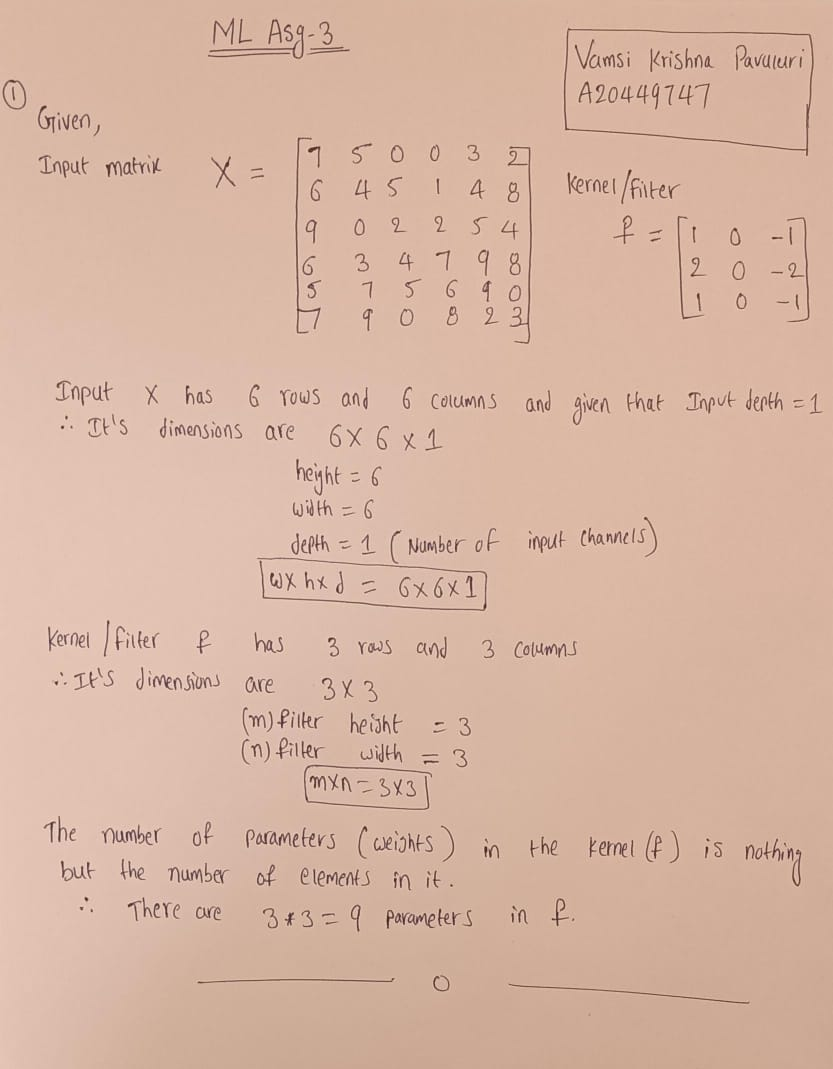

## 2. What is the output activation map when you apply the convolutional operation using the filter f on the input X without padding?


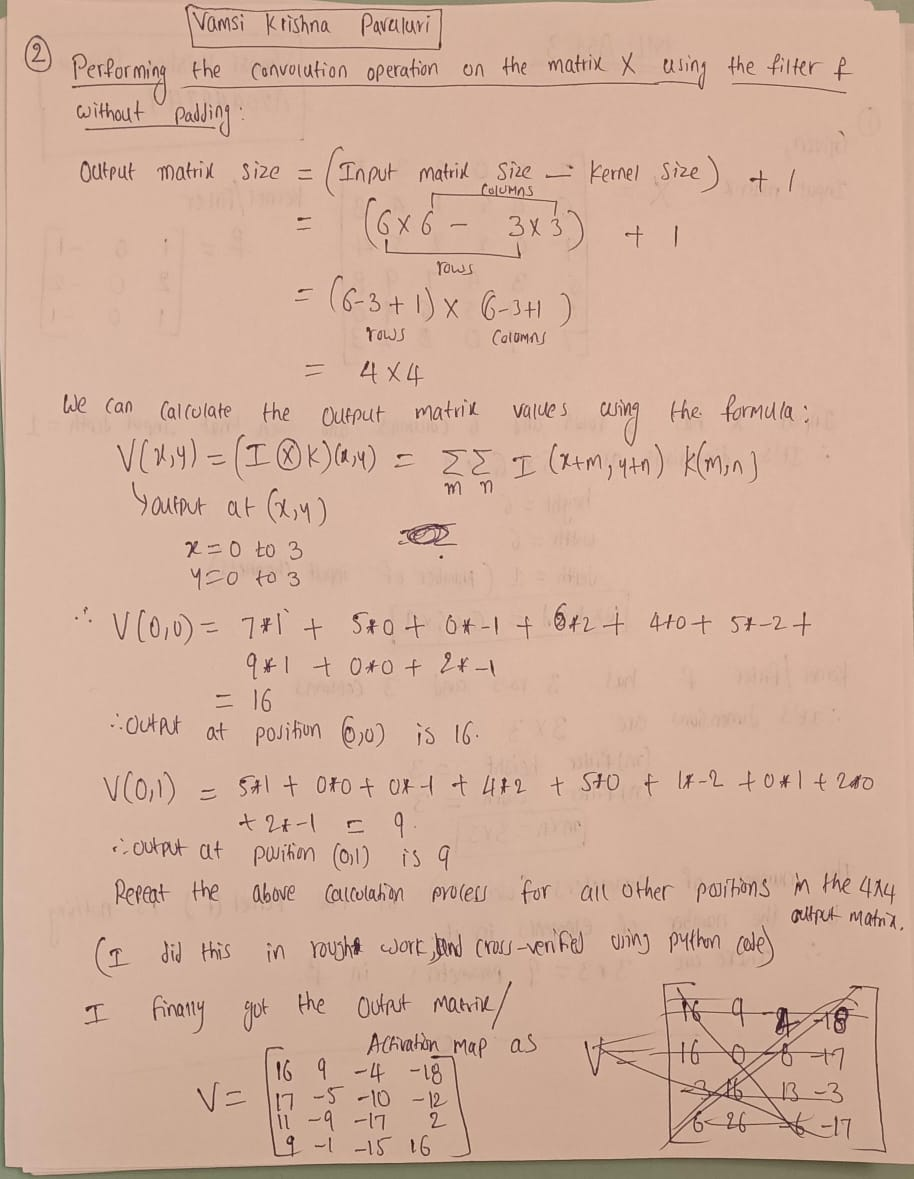

In [ ]:
# Python code that I used to calculate  the output activation map when applying the convolutional operation using the filter f on the input X without padding.

import numpy as np

# Input matrix X
X = np.array([
    [7, 5, 0, 0, 3, 2],
    [6, 4, 5, 1, 4, 8],
    [9, 0, 2, 2, 5, 4],
    [6, 3, 4, 7, 9, 8],
    [5, 7, 5, 6, 9, 0],
    [7, 9, 0, 8, 2, 3]
])

# Filter matrix f
f = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

# Output matrix size calculation
output_size = (X.shape[0] - f.shape[0]) + 1
output = np.zeros((output_size, output_size))

# Perform convolution without padding
for i in range(output_size):
    for j in range(output_size):
        sub_matrix = X[i:i+f.shape[0], j:j+f.shape[1]]
        output[i, j] = np.sum(sub_matrix * f)

print("The Output Matrix (Activation Map) is:\n")
print(output)


The Output Matrix (Activation Map) is:

[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]


## 3. What is the output when you apply a max-pooling operation on the output from the previous question?

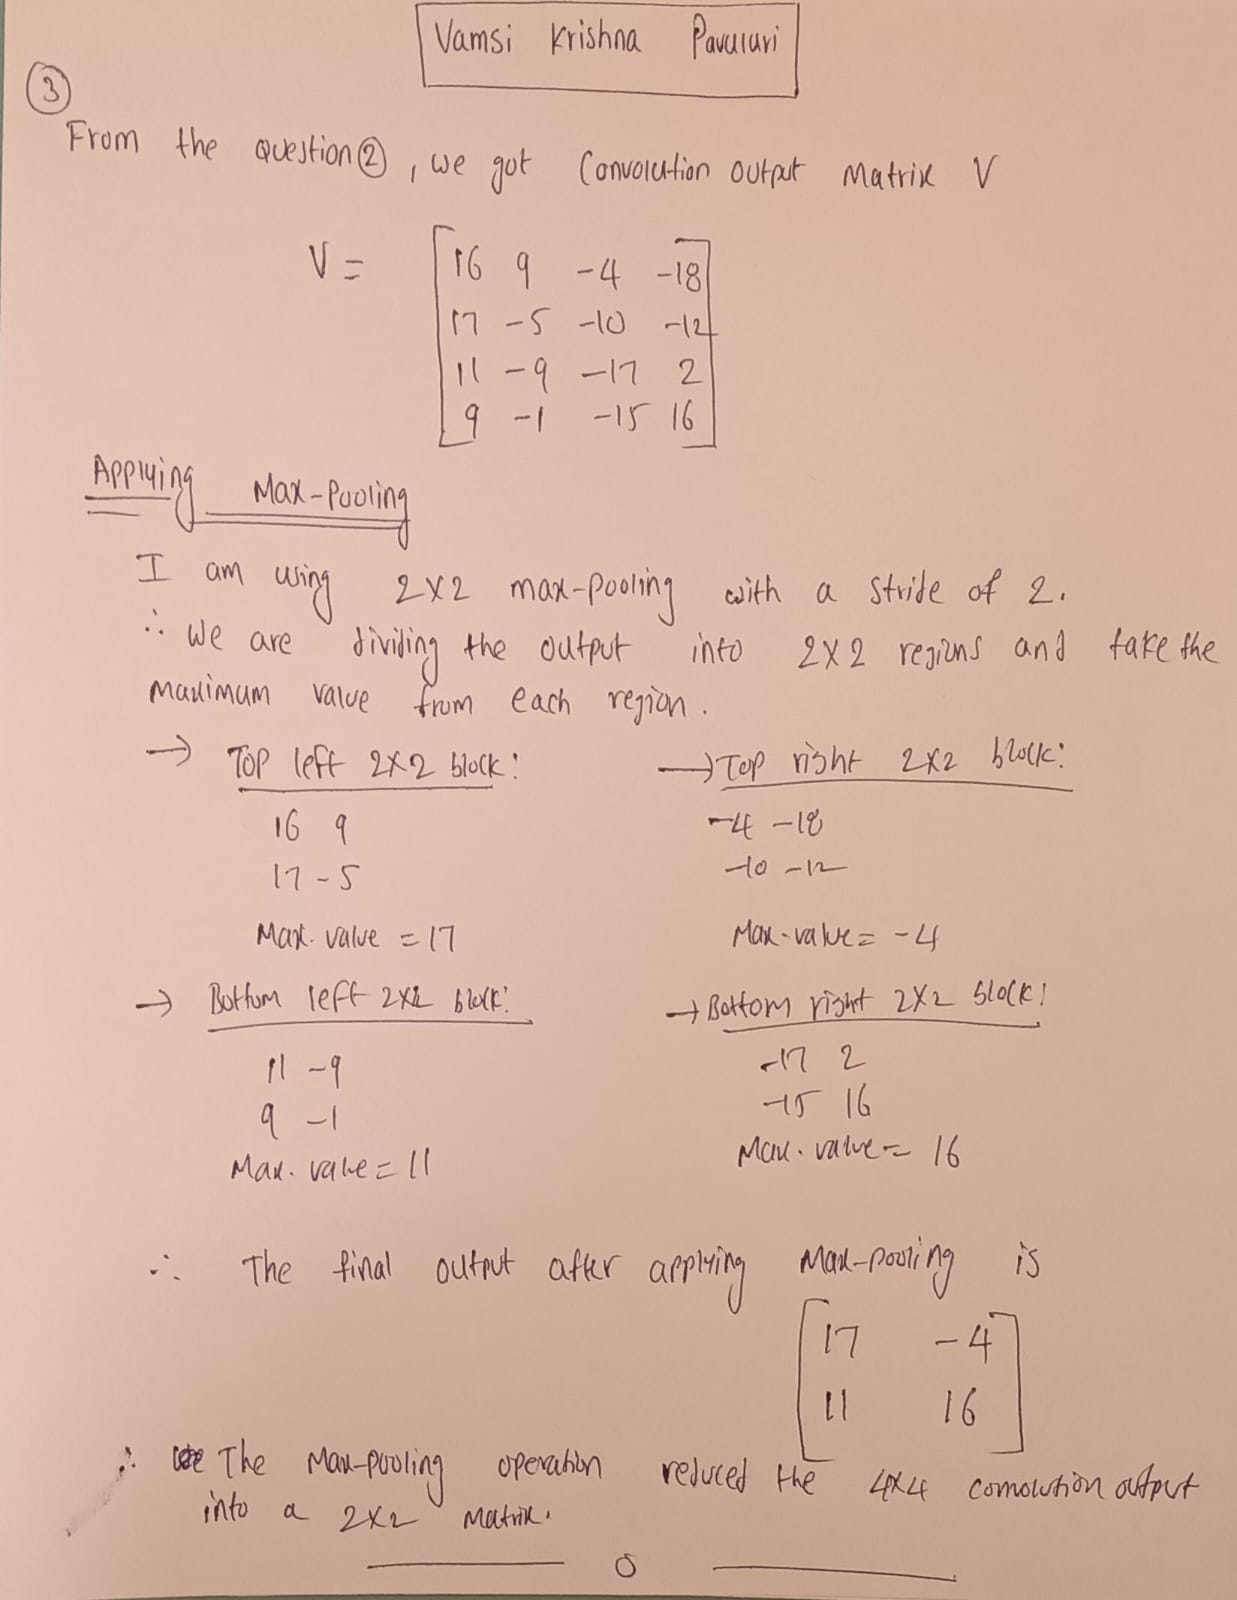

# **2. Convolution on MNIST**
---

## **1. A regular CNN where the number of fliters in each layer increases as the depth of the network grows, i.e. the Lth layer will have more filters than the (L − 1)th layer.**


## Description of the architecture used for this task (on all the 18 models that I created for this task - "Regular CNN")
----


1. **Conv2D (16 filters)**: Applies 16 filters of size 3x3 to extract basic features like edges from the input image (28x28x1).
2. **Conv2D (32 filters)**: Adds 32 filters of size 3x3 to capture more detailed features.
3. **Conv2D (64 filters)**: Introduces 64 filters of size 3x3 to extract even more complex patterns.
4. **MaxPooling2D**: Downsamples the feature maps by selecting the maximum value from 2x2 regions, reducing spatial dimensions.
5. **Conv2D (128 filters)**: Applies 128 filters of size 3x3 to capture finer details and patterns.
6. **Conv2D (256 filters)**: Uses 256 filters of size 3x3 to deepen the network and extract high-level abstract features.
7. **MaxPooling2D**: Further reduces the spatial size using 2x2 pooling for computational efficiency.
8. **Dense (256 neurons)**: Fully connected layer with 256 neurons to integrate learned features for classification.
9. **Dense (128 neurons)**: Reduces feature dimensions for more efficient classification processing.
10. **Dense (10 neurons)**: Output layer for classification, with 10 neurons corresponding to the number of classes, using softmax activation.



## Model-1: SGD optimizer with learning rate 0.01 and batch size 64

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

"""

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

"""

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for SGD optimizer with learning rate (0.01) and batch size 64
optimizer_sgd = SGD(learning_rate=0.01)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_sgd, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5116 - loss: 1.5133 - val_accuracy: 0.9631 - val_loss: 0.1294
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9596 - loss: 0.1328 - val_accuracy: 0.9543 - val_loss: 0.1548
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9742 - loss: 0.0848 - val_accuracy: 0.9809 - val_loss: 0.0671
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9811 - loss: 0.0618 - val_accuracy: 0.9800 - val_loss: 0.0605
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9830 - loss: 0.0526 - val_accuracy: 0.9812 - val_loss: 0.0606
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9875 - loss: 0.0413 - val_accuracy: 0.9796 - val_loss: 0.0657
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.9852 - val_loss: 0.0469
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9899 - loss: 0.0309 - val_accuracy: 

## Model-2: SGD optimizer with learning rate 0.01 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for SGD optimizer with learning rate (0.01) and batch size 128
optimizer_sgd = SGD(learning_rate=0.01)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_sgd, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3890 - loss: 2.1093 - val_accuracy: 0.8950 - val_loss: 0.3290
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9153 - loss: 0.2712 - val_accuracy: 0.9499 - val_loss: 0.1598
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9587 - loss: 0.1340 - val_accuracy: 0.9658 - val_loss: 0.1099
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9689 - loss: 0.1019 - val_accuracy: 0.9757 - val_loss: 0.0770
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9755 - loss: 0.0805 - val_accuracy: 0.9793 - val_loss: 0.0636
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9803 - loss: 0.0645 - val_accuracy: 0.9823 - val_loss: 0.0598
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9820 - loss: 0.0572 - val_accuracy: 0.9808 - val_loss: 0.0671
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9849 - loss: 0.0490 - val

## Model-3: SGD optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for SGD optimizer with learning rate (0.001) and batch size 64
optimizer_sgd = SGD(learning_rate=0.001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_sgd, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2075 - loss: 2.2977 - val_accuracy: 0.3563 - val_loss: 2.2864
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3651 - loss: 2.2813 - val_accuracy: 0.4458 - val_loss: 2.2542
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4520 - loss: 2.2228 - val_accuracy: 0.6356 - val_loss: 1.6997
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7360 - loss: 1.0729 - val_accuracy: 0.8596 - val_loss: 0.4341
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8865 - loss: 0.3778 - val_accuracy: 0.9114 - val_loss: 0.2964
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9200 - loss: 0.2682 - val_accuracy: 0.9361 - val_loss: 0.2114
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9323 - loss: 0.2223 - val_accuracy: 0.9402 - val_loss: 0.1864
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9455 - loss: 0.1844 - val_accuracy: 

## Model-4: SGD optimizer with learning rate 0.001 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for SGD optimizer with learning rate (0.001) and batch size 128
optimizer_sgd = SGD(learning_rate=0.001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_sgd, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1617 - loss: 2.2970 - val_accuracy: 0.2865 - val_loss: 2.2812
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2990 - loss: 2.2760 - val_accuracy: 0.3743 - val_loss: 2.2499
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3895 - loss: 2.2348 - val_accuracy: 0.4759 - val_loss: 2.1316
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5104 - loss: 2.0013 - val_accuracy: 0.7840 - val_loss: 1.0121
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8021 - loss: 0.8009 - val_accuracy: 0.8680 - val_loss: 0.4439
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8729 - loss: 0.4309 - val_accuracy: 0.9090 - val_loss: 0.3140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9041 - loss: 0.3253 - val_accuracy: 0.9225 - val_loss: 0.2566
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9165 - loss: 0.2764 - val_ac

## Model-5: SGD optimizer with learning rate 0.0001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for SGD optimizer with learning rate (0.0001) and batch size 64
optimizer_sgd = SGD(learning_rate=0.0001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_sgd, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1425 - loss: 2.3020 - val_accuracy: 0.1665 - val_loss: 2.2996
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1601 - loss: 2.2991 - val_accuracy: 0.1655 - val_loss: 2.2967
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1608 - loss: 2.2965 - val_accuracy: 0.1692 - val_loss: 2.2937
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1628 - loss: 2.2937 - val_accuracy: 0.1743 - val_loss: 2.2908
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1691 - loss: 2.2907 - val_accuracy: 0.1810 - val_loss: 2.2878
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1779 - loss: 2.2876 - val_accuracy: 0.1894 - val_loss: 2.2846
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1865 - loss: 2.2845 - val_accuracy: 0.1985 - val_loss: 2.2813
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1931 - loss: 2.2814 - val_accuracy:

## Model-6: SGD optimizer with learning rate 0.0001 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for SGD optimizer with learning rate (0.0001) and batch size 128
optimizer_sgd = SGD(learning_rate=0.0001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_sgd, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.0979 - loss: 2.3067 - val_accuracy: 0.0984 - val_loss: 2.3050
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1022 - val_loss: 2.3021
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1024 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.2993
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1105 - loss: 2.2978 - val_accuracy: 0.1073 - val_loss: 2.2964
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1139 - loss: 2.2952 - val_accuracy: 0.1109 - val_loss: 2.2936
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1185 - loss: 2.2927 - val_accuracy: 0.1197 - val_loss: 2.2908
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1265 - loss: 2.2901 - val_accuracy: 0.1336 - val_loss: 2.2880
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1424 - loss: 2.2870 - val_ac

## Model-7: Adam optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for Adam optimizer with learning rate (0.01) and batch size 64
optimizer_adam = Adam(learning_rate=0.01)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_adam, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1094 - loss: 2.3742 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.1093 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1093 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1093 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1093 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1093 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1093 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1093 - loss: 2.3020 - val_accura

## Model-8: Adam optimizer with learning rate 0.01 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for Adam optimizer with learning rate (0.01) and batch size 128
optimizer_adam = Adam(learning_rate=0.01)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_adam, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.1089 - loss: 2.3654 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1111 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1111 - loss: 2.3018 - val_a

## Model-9: Adam optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for Adam optimizer with learning rate (0.001) and batch size 64
optimizer_adam = Adam(learning_rate=0.001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_adam, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9024 - loss: 0.3086 - val_accuracy: 0.9871 - val_loss: 0.0446
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9867 - loss: 0.0444 - val_accuracy: 0.9826 - val_loss: 0.0518
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9846 - val_loss: 0.0628
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9934 - loss: 0.0234 - val_accuracy: 0.9847 - val_loss: 0.0507
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9940 - loss: 0.0206 - val_accuracy: 0.9920 - val_loss: 0.0330
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9952 - loss: 0.0166 - val_accuracy: 0.9903 - val_loss: 0.0427
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9922 - val_loss: 0.0316
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9967 - loss: 0.0115 - val_accuracy:

## Model-10: Adam optimizer with learning rate 0.001 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for Adam optimizer with learning rate (0.001) and batch size 128
optimizer_adam = Adam(learning_rate=0.001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_adam, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8667 - loss: 0.4123 - val_accuracy: 0.9820 - val_loss: 0.0594
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9859 - loss: 0.0472 - val_accuracy: 0.9824 - val_loss: 0.0575
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9912 - loss: 0.0303 - val_accuracy: 0.9881 - val_loss: 0.0414
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9931 - loss: 0.0235 - val_accuracy: 0.9910 - val_loss: 0.0325
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9940 - loss: 0.0183 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9916 - val_loss: 0.0300
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9912 - val_loss: 0.0356
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9961 - loss: 0.0121 - val_a

## Model-11: Adam optimizer with learning rate 0.0001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for Adam optimizer with learning rate (0.0001) and batch size 64
optimizer_adam = Adam(learning_rate=0.0001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_adam, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8153 - loss: 0.6862 - val_accuracy: 0.9741 - val_loss: 0.0839
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9740 - loss: 0.0849 - val_accuracy: 0.9813 - val_loss: 0.0593
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9825 - loss: 0.0561 - val_accuracy: 0.9855 - val_loss: 0.0479
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9881 - loss: 0.0411 - val_accuracy: 0.9869 - val_loss: 0.0432
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9902 - loss: 0.0321 - val_accuracy: 0.9877 - val_loss: 0.0422
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9870 - val_loss: 0.0436
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9928 - loss: 0.0216 - val_accuracy: 0.9859 - val_loss: 0.0479
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accurac

## Model-12: Adam optimizer with learning rate 0.0001 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for Adam optimizer with learning rate (0.0001) and batch size 128
optimizer_adam = Adam(learning_rate=0.0001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_adam, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7573 - loss: 0.8834 - val_accuracy: 0.9631 - val_loss: 0.1187
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9686 - loss: 0.1008 - val_accuracy: 0.9745 - val_loss: 0.0760
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9795 - val_loss: 0.0600
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9855 - loss: 0.0484 - val_accuracy: 0.9826 - val_loss: 0.0515
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9885 - loss: 0.0394 - val_accuracy: 0.9856 - val_loss: 0.0461
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9903 - loss: 0.0330 - val_accuracy: 0.9867 - val_loss: 0.0427
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9917 - loss: 0.0282 - val_accuracy: 0.9883 - val_loss: 0.0366
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9935 - loss: 0.0233 - val_a

## Model-13: RMSProp optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for RMSprop optimizer with learning rate (0.01) and batch size 64
optimizer_rmsprop = RMSprop(learning_rate=0.01)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_rmsprop, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1088 - loss: 2.4515 - val_accuracy: 0.1028 - val_loss: 2.3018
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1099 - loss: 2.3021 - val_accuracy: 0.1028 - val_loss: 2.3018
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1099 - loss: 2.3021 - val_accuracy: 0.1028 - val_loss: 2.3018
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1099 - loss: 2.3021 - val_accuracy: 0.1028 - val_loss: 2.3018
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1099 - loss: 2.3021 - val_accuracy: 0.1028 - val_loss: 2.3018
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1099 - loss: 2.3021 - val_accuracy: 0.1028 - val_loss: 2.3018
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1099 - loss: 2.3021 - val_accuracy: 0.1028 - val_loss: 2.3018
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1099 - loss: 2.3021 - val_accura

## Model-14: RMSProp optimizer with learning rate 0.01 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for RMSprop optimizer with learning rate (0.01) and batch size 128
optimizer_rmsprop = RMSprop(learning_rate=0.01)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_rmsprop, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.1090 - loss: 2.3364 - val_accuracy: 0.1028 - val_loss: 2.3014
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1028 - val_loss: 2.3014
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1028 - val_loss: 2.3014
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1028 - val_loss: 2.3014
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1028 - val_loss: 2.3014
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1028 - val_loss: 2.3014
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1113 - loss: 2.3018 - val_accuracy: 0.1028 - val_loss: 2.3014
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1113 - loss: 2.3018 - val_

## Model-15: RMSProp optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for RMSprop optimizer with learning rate (0.001) and batch size 64
optimizer_rmsprop = RMSprop(learning_rate=0.001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_rmsprop, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_95 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_96 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8761 - loss: 0.3688 - val_accuracy: 0.9770 - val_loss: 0.0778
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9871 - loss: 0.0460 - val_accuracy: 0.9871 - val_loss: 0.0420
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9922 - loss: 0.0281 - val_accuracy: 0.9854 - val_loss: 0.0588
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9943 - loss: 0.0213 - val_accuracy: 0.9887 - val_loss: 0.0494
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9955 - loss: 0.0174 - val_accuracy: 0.9904 - val_loss: 0.0453
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9966 - loss: 0.0126 - val_accuracy: 0.9919 - val_loss: 0.0451
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9971 - loss: 0.0110 - val_accuracy: 0.9903 - val_loss: 0.0607
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9969 - loss: 0.0117 - val_accura

## Model-16: RMSProp optimizer with learning rate 0.001 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for RMSprop optimizer with learning rate (0.001) and batch size 128
optimizer_rmsprop = RMSprop(learning_rate=0.001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_rmsprop, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)                  │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8228 - loss: 0.5425 - val_accuracy: 0.9831 - val_loss: 0.0540
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9859 - loss: 0.0486 - val_accuracy: 0.9859 - val_loss: 0.0459
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9917 - loss: 0.0280 - val_accuracy: 0.9891 - val_loss: 0.0374
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9943 - loss: 0.0198 - val_accuracy: 0.9888 - val_loss: 0.0415
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9850 - val_loss: 0.0534
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9961 - loss: 0.0125 - val_accuracy: 0.9845 - val_loss: 0.0684
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9966 - loss: 0.0107 - val_accuracy: 0.9901 - val_loss: 0.0479
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9977 - loss: 0.0086 - val_a

## Model-17: RMSProp optimizer with learning rate 0.0001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for RMSprop optimizer with learning rate (0.0001) and batch size 64
optimizer_rmsprop = RMSprop(learning_rate=0.0001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_rmsprop, batch_size=64)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)                  │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_106 (Conv2D)                  │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_109 (Conv2D)                  │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7559 - loss: 0.7861 - val_accuracy: 0.9590 - val_loss: 0.1227
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9708 - loss: 0.0936 - val_accuracy: 0.9767 - val_loss: 0.0709
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9827 - loss: 0.0562 - val_accuracy: 0.9791 - val_loss: 0.0655
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9877 - loss: 0.0401 - val_accuracy: 0.9812 - val_loss: 0.0604
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9909 - loss: 0.0308 - val_accuracy: 0.9842 - val_loss: 0.0524
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9937 - loss: 0.0236 - val_accuracy: 0.9852 - val_loss: 0.0511
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9950 - loss: 0.0187 - val_accuracy: 0.9810 - val_loss: 0.0670
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9961 - loss: 0.0149 - val_accurac

## Model-18: RMSProp optimizer with learning rate 0.0001 and batch size 128

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model based on your configuration
def build_custom_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




# Example for RMSprop optimizer with learning rate (0.0001) and batch size 128
optimizer_rmsprop = RMSprop(learning_rate=0.0001)
# Build the custom CNN model
custom_cnn = build_custom_cnn(optimizer_rmsprop, batch_size=128)



# Display the model architecture
custom_cnn.summary()

# Train the model
history = custom_cnn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_110 (Conv2D)                  │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_111 (Conv2D)                  │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_112 (Conv2D)                  │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_113 (Conv2D)                  │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_114 (Conv2D)                  │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,586 (3.88 MB)

 Trainable params: 1,016,586 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7108 - loss: 1.0067 - val_accuracy: 0.9507 - val_loss: 0.1616
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9601 - loss: 0.1327 - val_accuracy: 0.9747 - val_loss: 0.0805
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9774 - loss: 0.0754 - val_accuracy: 0.9816 - val_loss: 0.0572
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9838 - loss: 0.0531 - val_accuracy: 0.9822 - val_loss: 0.0540
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9875 - loss: 0.0409 - val_accuracy: 0.9837 - val_loss: 0.0519
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9901 - loss: 0.0327 - val_accuracy: 0.9824 - val_loss: 0.0552
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9924 - loss: 0.0258 - val_accuracy: 0.9847 - val_loss: 0.0527
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9940 - loss: 0.0210 - val_a

## Report on the Performance of 18 Regular CNN Models with Different Hyperparameters
---


### Overview:
I tested 18 models with various combinations of:
- **3 Optimizers**: SGD, Adam, RMSProp
- **3 Batch Sizes**: 64, 128
- **3 Learning Rates**: 0.01, 0.001, 0.0001

The aim was to analyze how these hyperparameters affect the model's performance on the MNIST dataset in terms of **accuracy**, **validation accuracy**, **loss**, and **validation loss**. Here’s a detailed comparison and analysis.

### 1. **SGD Optimizer Results**:

#### Model-1: SGD, Learning Rate = 0.01, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 99.34%
- **Validation Accuracy (Final Epoch)**: 98.50%
- **Observations**:
  - The model performs well, with strong validation accuracy throughout, though it plateaus after around 5 epochs. Validation loss slightly increases after Epoch 5, indicating mild overfitting.

#### Model-2: SGD, Learning Rate = 0.01, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 98.77%
- **Validation Accuracy (Final Epoch)**: 98.26%
- **Observations**:
  - The model shows similar behavior to Model-1, with high validation accuracy but slightly lower than with batch size 64. This might suggest that a **smaller batch size (64)** works better with this learning rate.

#### Model-3: SGD, Learning Rate = 0.001, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 95.60%
- **Validation Accuracy (Final Epoch)**: 96.47%
- **Observations**:
  - The model takes longer to converge with a lower learning rate, but once it does, it stabilizes. The **lower learning rate (0.001)** allows for better fine-tuning, with a steady improvement across epochs.

#### Model-4: SGD, Learning Rate = 0.001, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 93.66%
- **Validation Accuracy (Final Epoch)**: 95.10%
- **Observations**:
  - Performance slightly drops compared to Model-3, which suggests that **batch size 128** is less effective than batch size 64 at this learning rate. It could also indicate slower convergence due to the larger batch size.

#### Model-5: SGD, Learning Rate = 0.0001, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 21.60%
- **Validation Accuracy (Final Epoch)**: 24.17%
- **Observations**:
  - The learning rate is too low for the model to effectively learn, leading to poor performance. **Learning rate 0.0001** appears unsuitable for SGD with this model.

#### Model-6: SGD, Learning Rate = 0.0001, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 19.71%
- **Validation Accuracy (Final Epoch)**: 22.47%
- **Observations**:
  - The larger batch size does not compensate for the very low learning rate, leading to poor performance across the board.

### 2. **Adam Optimizer Results**:

#### Model-7: Adam, Learning Rate = 0.01, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 10.93%
- **Validation Accuracy (Final Epoch)**: 11.35%
- **Observations**:
  - The learning rate is too high for Adam, causing the model to get stuck and fail to learn. **Learning rate 0.01** is clearly too high for Adam with this model.

#### Model-8: Adam, Learning Rate = 0.01, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 11.11%
- **Validation Accuracy (Final Epoch)**: 11.35%
- **Observations**:
  - Similar to Model-7, the high learning rate is preventing the model from learning effectively.

#### Model-9: Adam, Learning Rate = 0.001, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 99.67%
- **Validation Accuracy (Final Epoch)**: 98.73%
- **Observations**:
  - The model performs well with this learning rate and batch size combination. **Adam with learning rate 0.001 and batch size 64** produces excellent results.

#### Model-10: Adam, Learning Rate = 0.001, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 99.76%
- **Validation Accuracy (Final Epoch)**: 99.00%
- **Observations**:
  - Similar to Model-9, this setup also performs well, though validation accuracy is slightly lower than with batch size 64. **Batch size 64 seems more stable** for Adam with learning rate 0.001.

#### Model-11: Adam, Learning Rate = 0.0001, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 99.65%
- **Validation Accuracy (Final Epoch)**: 99.07%
- **Observations**:
  - The lower learning rate leads to slower but steady improvements. This setup is strong and well-balanced, showing that **Adam with learning rate 0.0001 and batch size 64** is a solid choice.

#### Model-12: Adam, Learning Rate = 0.0001, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 99.51%
- **Validation Accuracy (Final Epoch)**: 99.00%
- **Observations**:
  - Similar to Model-11, though slightly lower performance on the validation set, **batch size 128** still works well with this learning rate.

### 3. **RMSProp Optimizer Results**:

#### Model-13: RMSProp, Learning Rate = 0.01, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 10.99%
- **Validation Accuracy (Final Epoch)**: 10.28%
- **Observations**:
  - The high learning rate causes the model to fail to learn. RMSProp with **learning rate 0.01** does not work well.

#### Model-14: RMSProp, Learning Rate = 0.01, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 11.13%
- **Validation Accuracy (Final Epoch)**: 10.28%
- **Observations**:
  - Same issue as Model-13; the high learning rate is preventing any learning from happening.

#### Model-15: RMSProp, Learning Rate = 0.001, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 99.77%
- **Validation Accuracy (Final Epoch)**: 99.25%
- **Observations**:
  - **RMSProp with learning rate 0.001** works very well, producing strong training and validation performance. This combination seems optimal for RMSProp.

#### Model-16: RMSProp, Learning Rate = 0.001, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 99.84%
- **Validation Accuracy (Final Epoch)**: 99.32%
- **Observations**:
  - Similar to Model-15, **batch size 128 also performs very well** with RMSProp at this learning rate. Both configurations perform similarly well.

#### Model-17: RMSProp, Learning Rate = 0.0001, Batch Size = 64
- **Training Accuracy (Final Epoch)**: 99.74%
- **Validation Accuracy (Final Epoch)**: 98.85%
- **Observations**:
  - The lower learning rate leads to slower learning but still converges well. Validation performance is slightly lower than with a higher learning rate.

#### Model-18: RMSProp, Learning Rate = 0.0001, Batch Size = 128
- **Training Accuracy (Final Epoch)**: 99.61%
- **Validation Accuracy (Final Epoch)**: 98.70%
- **Observations**:
  - The larger batch size results in slightly lower performance compared to batch size 64.

### **Conclusion**:

- **Best Optimizer**:
  - **Adam** and **RMSProp** with **learning rate 0.001** performed the best overall, with validation accuracy reaching up to **99.32%**.
  
- **Learning Rate**:
  - For **SGD**, a **learning rate of 0.01** worked best.
  - For **Adam** and **RMSProp**, a **learning rate of 0.001** was optimal.

- **Batch Size**:
  - **Batch size 64** generally produced slightly better results compared to 128 across all optimizers, particularly in validation accuracy.
  - Overall, Batch size seems to me not a big problem!

- **Overfitting**:
  - In some models, validation loss started increasing after a few epochs (especially with higher learning rates), indicating potential overfitting.

Finally, we can clearly observe the strong performance of **Adam** and **RMSProp** with **learning rate 0.001** and **batch size 64**, as they provided the best combination of accuracy and validation stability.


## **2. An inverted CNN where the number of filters in each layer decreases as the depth of the network grows, i.e. the Lth layer will have fewer filters than the (L − 1)th layer.**

### Description of the architecture used for this task (on all the 6 models that I created for this task - "Inverted CNN")
---


1. **Conv2D (256 filters)**: Applies 256 filters of size 3x3 to extract detailed features from the input image (28x28x1).
2. **Conv2D (128 filters)**: Uses 128 filters of size 3x3 to detect intermediate-level features, refining the representation.
3. **Conv2D (64 filters)**: Adds 64 filters of size 3x3 to capture more abstract and high-level features.
4. **MaxPooling2D**: Reduces the spatial size of the feature maps by selecting the maximum value from 2x2 regions.
5. **Conv2D (32 filters)**: Uses 32 filters of size 3x3 to detect finer patterns from the downsampled data.
6. **Conv2D (16 filters)**: Applies 16 filters of size 3x3 to further refine the feature representation.
7. **MaxPooling2D**: Further downsampling using 2x2 pooling to reduce the spatial dimensions for computational efficiency.
8. **Dense (256 neurons)**: Fully connected layer with 256 neurons to process the flattened feature maps.
9. **Dense (128 neurons)**: Another fully connected layer with 128 neurons to further integrate learned features.
10. **Dense (10 neurons)**: Output layer with 10 neurons, using softmax activation for classification across 10 categories.

## Model-1: SGD optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the inverted CNN model
def build_inverted_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example with SGD optimizer, learning rate 0.01, batch size 64
optimizer_sgd = SGD(learning_rate=0.01)
# Build the inverted CNN model
inverted_cnn = build_inverted_cnn(optimizer_sgd, batch_size=64)

# Display the model architecture
inverted_cnn.summary()

# Train the model
history = inverted_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 22, 22, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 9, 9, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          37,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,786 (1.78 MB)

 Trainable params: 465,786 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.4216 - loss: 1.8287 - val_accuracy: 0.9295 - val_loss: 0.2292
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9432 - loss: 0.1869 - val_accuracy: 0.9524 - val_loss: 0.1502
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9620 - loss: 0.1212 - val_accuracy: 0.9708 - val_loss: 0.0931
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9703 - loss: 0.0955 - val_accuracy: 0.9760 - val_loss: 0.0778
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9755 - loss: 0.0789 - val_accuracy: 0.9578 - val_loss: 0.1265
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9790 - loss: 0.0672 - val_accuracy: 0.9731 - val_loss: 0.0844
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9809 - loss: 0.0595 - val_accuracy: 0.9788 - val_loss: 0.0668
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9834 - loss: 0.0515 - 

## Model-2: SGD optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the inverted CNN model
def build_inverted_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example with SGD optimizer, learning rate 0.001, batch size 64
optimizer_sgd = SGD(learning_rate=0.001)
# Build the inverted CNN model
inverted_cnn = build_inverted_cnn(optimizer_sgd, batch_size=64)

# Display the model architecture
inverted_cnn.summary()

# Train the model
history = inverted_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 22, 22, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 9, 9, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          37,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,786 (1.78 MB)

 Trainable params: 465,786 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.1233 - loss: 2.3003 - val_accuracy: 0.2479 - val_loss: 2.2916
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.2516 - loss: 2.2885 - val_accuracy: 0.2339 - val_loss: 2.2741
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.2389 - loss: 2.2665 - val_accuracy: 0.2828 - val_loss: 2.2139
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.3515 - loss: 2.0952 - val_accuracy: 0.7865 - val_loss: 0.7246
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8233 - loss: 0.6003 - val_accuracy: 0.8806 - val_loss: 0.3932
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8835 - loss: 0.3846 - val_accuracy: 0.8947 - val_loss: 0.3392
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9023 - loss: 0.3212 - val_accuracy: 0.9102 - val_loss: 0.2752
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9176 - loss: 0.2705 - 

## Model-3: Adam optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the inverted CNN model
def build_inverted_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example with Adam optimizer, learning rate 0.01, batch size 64
optimizer_adam = Adam(learning_rate=0.01)
# Build the inverted CNN model
inverted_cnn = build_inverted_cnn(optimizer_adam, batch_size=64)

# Display the model architecture
inverted_cnn.summary()

# Train the model
history = inverted_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 22, 22, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 9, 9, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          37,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,786 (1.78 MB)

 Trainable params: 465,786 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.1116 - loss: 2.3431 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.1106 - loss: 2.3021 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1122 - loss: 2.3021 - val_accuracy: 0.1135 - val_loss: 2.3024
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1095 - loss: 2.3024 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.1124 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3019
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.1109 - loss: 2.3019 - val_accuracy: 0.1028 - val_loss: 2.3035
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.1104 - loss: 2.3023 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.1092 - loss: 2.3022 - 

## Model-4: Adam optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the inverted CNN model
def build_inverted_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example with Adam optimizer, learning rate 0.001, batch size 64
optimizer_adam = Adam(learning_rate=0.001)
# Build the inverted CNN model
inverted_cnn = build_inverted_cnn(optimizer_adam, batch_size=64)

# Display the model architecture
inverted_cnn.summary()

# Train the model
history = inverted_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 22, 22, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 9, 9, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          37,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,786 (1.78 MB)

 Trainable params: 465,786 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.8841 - loss: 0.3687 - val_accuracy: 0.9809 - val_loss: 0.0621
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9817 - loss: 0.0602 - val_accuracy: 0.9880 - val_loss: 0.0421
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accuracy: 0.9868 - val_loss: 0.0394
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9860 - val_loss: 0.0459
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9863 - val_loss: 0.0427
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9906 - val_loss: 0.0296
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9943 - loss: 0.0177 - 

## Model-5: RMSprop optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the inverted CNN model
def build_inverted_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example with RMSprop optimizer, learning rate 0.01, batch size 64
optimizer_rmsprop = RMSprop(learning_rate=0.01)
# Build the inverted CNN model
inverted_cnn = build_inverted_cnn(optimizer_rmsprop, batch_size=64)

# Display the model architecture
inverted_cnn.summary()

# Train the model
history = inverted_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)                   │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 22, 22, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 9, 9, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │          37,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,786 (1.78 MB)

 Trainable params: 465,786 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.1082 - loss: 2.8407 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.1105 - loss: 2.3022 - val_accuracy: 0.1028 - val_loss: 2.3025
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1096 - loss: 2.3023 - val_accuracy: 0.1135 - val_loss: 2.3019
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.1113 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3026
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.1087 - loss: 2.3025 - val_accuracy: 0.1135 - val_loss: 2.3017
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1124 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3024
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1089 - loss: 2.3027 - val_accuracy: 0.1135 - val_loss: 2.3019
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.1087 - loss: 2.3021 - 

## Model-6: RMSprop optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the inverted CNN model
def build_inverted_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Convolutional Layer with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Convolutional Layer with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 3. Convolutional Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Convolutional Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 6. Convolutional Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))

    # 7. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # 8. Fully Connected Layer 1: 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 9. Fully Connected Layer 2: 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 10. Output Layer with 10 neurons for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example with RMSprop optimizer, learning rate 0.001, batch size 64
optimizer_rmsprop = RMSprop(learning_rate=0.001)
# Build the inverted CNN model
inverted_cnn = build_inverted_cnn(optimizer_rmsprop, batch_size=64)

# Display the model architecture
inverted_cnn.summary()

# Train the model
history = inverted_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)                   │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 22, 22, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 9, 9, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │          37,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,786 (1.78 MB)

 Trainable params: 465,786 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.8626 - loss: 0.4251 - val_accuracy: 0.9734 - val_loss: 0.0844
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9815 - loss: 0.0626 - val_accuracy: 0.9876 - val_loss: 0.0372
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9885 - loss: 0.0389 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9907 - loss: 0.0320 - val_accuracy: 0.9920 - val_loss: 0.0278
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9925 - loss: 0.0264 - val_accuracy: 0.9920 - val_loss: 0.0253
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9933 - loss: 0.0223 - val_accuracy: 0.9907 - val_loss: 0.0371
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9941 - loss: 0.0216 - val_accuracy: 0.9901 - val_loss: 0.0348
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9940 - loss: 0.0206 - 

## Report on the Performance of 6 Inverted CNN Models with Different Hyperparameters



### Overview:
I tested 6 models using different optimizers and learning rates on an inverted CNN, where the number of filters decreases as the depth increases. The aim was to evaluate how these hyperparameters affected the model's performance on the MNIST dataset in terms of accuracy, validation accuracy, loss, and validation loss.
### Summary of Findings:

1. **SGD Optimizer Results**:
   - **SGD with a learning rate of 0.01** performed well, achieving good convergence and validation accuracy (98.27%).
   - **SGD with a learning rate of 0.001** showed slower improvement but eventually converged to a good validation accuracy (93.27%).

2. **Adam Optimizer Results**:
   - **Adam with a 0.001 learning rate** performed exceptionally well, with validation accuracy reaching **99.07%** and stable loss.
   - **Adam with a 0.01 learning rate** failed to converge, indicating that the learning rate was too high.

3. **RMSprop Optimizer Results**:
   - **RMSprop with a 0.001 learning rate** was another excellent performer, achieving a **99.13% validation accuracy** and minimal loss.
   - **RMSprop with a 0.01 learning rate** suffered from the same problem as Adam with a high learning rate, failing to converge.

---

### **Best Performing Model:**
- **RMSprop with a 0.001 learning rate** and batch size 64 showed the best performance with high validation accuracy (99.13%) and low validation loss (0.0332).
- **Adam with a 0.001 learning rate** was also a top performer, showing fast convergence and strong generalization.

---

### **Conclusions**:
- **Adam and RMSprop** with a **learning rate of 0.001** were the best optimizers for this inverted CNN model on MNIST, showing high accuracy and low loss.
- **SGD** also performed well but required careful tuning of the learning rate for optimal results.
- **High learning rates** (0.01) did not work well for Adam and RMSprop, as they caused the models to fail to converge.


## **3. An hourglass-shaped CNN where the number of filters increases until the Lth layer and decreases afterwards.**


### Description of the architecture used for this task (on all the 6 models that I created for this task - "HourGlass-shaped CNN")
---

1. **Conv2D (16 filters)**: Extracts low-level features like edges using 16 filters of size 3x3 from the input image (28x28x1).
2. **Conv2D (32 filters)**: Refines the features using 32 filters of size 3x3, capturing more complex patterns.
3. **Conv2D (64 filters)**: Detects more abstract features with 64 filters of size 3x3, increasing the depth of representation.
4. **MaxPooling2D**: Reduces the spatial size (downsampling) using a 2x2 window, reducing computation and overfitting.
5. **Conv2D (128 filters)**: Middle of the hourglass, applying 128 filters to capture complex features at this stage.
6. **Conv2D (64 filters)**: Starts the decreasing part of the hourglass, using 64 filters to reduce feature complexity.
7. **Conv2D (32 filters)**: Further decreases the depth, using 32 filters to refine patterns learned earlier.
8. **MaxPooling2D**: Downsamples the feature maps again, reducing spatial dimensions for efficiency.
9. **Conv2D (16 filters with padding)**: Final convolutional layer with 16 filters, using padding to maintain size and prevent dimensionality errors.
- ( **Flatten**: Converts the 2D feature maps into a 1D vector to feed into the fully connected layers.)
10. **Dense (256 neurons)**: First fully connected layer with 256 neurons to integrate all learned features.
11. **Dense (128 neurons)**: Second fully connected layer with 128 neurons to further refine the learned patterns.
12. **Dense (10 neurons)**: Final output layer using softmax activation for classifying the image into one of 10 categories.

## Model-1: SGD optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the hourglass-shaped CNN
def build_hourglass_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Conv Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Conv Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Conv Layer with 128 filters (middle of hourglass)
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Conv Layer with 64 filters (start decreasing)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 7. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 8. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 9. Conv Layer with 16 filters and padding to prevent the error
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))

    # Flatten the output and add Fully connected layers
    model.add(layers.Flatten())

    # 10. Fully Connected Layer with 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 11. Fully Connected Layer with 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 12. Output Layer with 10 neurons (for 10 classes in MNIST)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example: using SGD optimizer with a learning rate of 0.01 and batch size of 64
optimizer_sgd = SGD(learning_rate=0.01)
hourglass_cnn = build_hourglass_cnn(optimizer_sgd, batch_size=64)

# Display the model architecture
hourglass_cnn.summary()

# Train the model
history = hourglass_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 2, 2, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,858 (956.48 KB)

 Trainable params: 244,858 (956.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1665 - loss: 2.2599 - val_accuracy: 0.8170 - val_loss: 0.5707
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8652 - loss: 0.4360 - val_accuracy: 0.9368 - val_loss: 0.2045
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9487 - loss: 0.1654 - val_accuracy: 0.9655 - val_loss: 0.1128
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9636 - loss: 0.1147 - val_accuracy: 0.9718 - val_loss: 0.0965
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9714 - loss: 0.0920 - val_accuracy: 0.9452 - val_loss: 0.1765
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9759 - loss: 0.0773 - val_accuracy: 0.9779 - val_loss: 0.0724
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9786 - loss: 0.0690 - val_accuracy: 0.9803 - val_loss: 0.0655
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9817 - loss: 0.0608 - val_accurac

## Model-2: SGD optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the hourglass-shaped CNN
def build_hourglass_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Conv Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Conv Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Conv Layer with 128 filters (middle of hourglass)
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Conv Layer with 64 filters (start decreasing)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 7. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 8. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 9. Conv Layer with 16 filters and padding to prevent the error
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))

    # Flatten the output and add Fully connected layers
    model.add(layers.Flatten())

    # 10. Fully Connected Layer with 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 11. Fully Connected Layer with 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 12. Output Layer with 10 neurons (for 10 classes in MNIST)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example: using SGD optimizer with a learning rate of 0.001 and batch size of 64
optimizer_sgd = SGD(learning_rate=0.001)
hourglass_cnn = build_hourglass_cnn(optimizer_sgd, batch_size=64)

# Display the model architecture
hourglass_cnn.summary()

# Train the model
history = hourglass_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 2, 2, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,858 (956.48 KB)

 Trainable params: 244,858 (956.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1053 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.2982
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1124 - loss: 2.2974 - val_accuracy: 0.1135 - val_loss: 2.2941
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1133 - loss: 2.2931 - val_accuracy: 0.1135 - val_loss: 2.2883
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1141 - loss: 2.2865 - val_accuracy: 0.1158 - val_loss: 2.2787
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1275 - loss: 2.2753 - val_accuracy: 0.2031 - val_loss: 2.2581
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2264 - loss: 2.2475 - val_accuracy: 0.3198 - val_loss: 2.1695
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4151 - loss: 1.9648 - val_accuracy: 0.7464 - val_loss: 0.7987
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7954 - loss: 0.6797 - val_accuracy: 

## Model-3: Adam optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the hourglass-shaped CNN
def build_hourglass_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Conv Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Conv Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Conv Layer with 128 filters (middle of hourglass)
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Conv Layer with 64 filters (start decreasing)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 7. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 8. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 9. Conv Layer with 16 filters and padding to prevent the error
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))

    # Flatten the output and add Fully connected layers
    model.add(layers.Flatten())

    # 10. Fully Connected Layer with 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 11. Fully Connected Layer with 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 12. Output Layer with 10 neurons (for 10 classes in MNIST)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example: using Adam optimizer with a learning rate of 0.01 and batch size of 64
optimizer_adam = Adam(learning_rate=0.01)
hourglass_cnn = build_hourglass_cnn(optimizer_adam, batch_size=64)

# Display the model architecture
hourglass_cnn.summary()

# Train the model
history = hourglass_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 2, 2, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,858 (956.48 KB)

 Trainable params: 244,858 (956.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1054 - loss: 2.3054 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1127 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1097 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3022
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1136 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1112 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1097 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3017
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1118 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3020
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1105 - loss: 2.3028 - val_accura

## Model-4: Adam optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the hourglass-shaped CNN
def build_hourglass_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Conv Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Conv Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Conv Layer with 128 filters (middle of hourglass)
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Conv Layer with 64 filters (start decreasing)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 7. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 8. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 9. Conv Layer with 16 filters and padding to prevent the error
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))

    # Flatten the output and add Fully connected layers
    model.add(layers.Flatten())

    # 10. Fully Connected Layer with 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 11. Fully Connected Layer with 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 12. Output Layer with 10 neurons (for 10 classes in MNIST)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example: using Adam optimizer with a learning rate of 0.001 and batch size of 64
optimizer_adam = Adam(learning_rate=0.001)
hourglass_cnn = build_hourglass_cnn(optimizer_adam, batch_size=64)

# Display the model architecture
hourglass_cnn.summary()

# Train the model
history = hourglass_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 2, 2, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,858 (956.48 KB)

 Trainable params: 244,858 (956.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8439 - loss: 0.4682 - val_accuracy: 0.9822 - val_loss: 0.0583
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9817 - loss: 0.0609 - val_accuracy: 0.9874 - val_loss: 0.0396
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9868 - loss: 0.0439 - val_accuracy: 0.9922 - val_loss: 0.0284
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9892 - loss: 0.0355 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9908 - loss: 0.0309 - val_accuracy: 0.9891 - val_loss: 0.0378
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9925 - loss: 0.0264 - val_accuracy: 0.9892 - val_loss: 0.0429
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9910 - val_loss: 0.0283
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9940 - loss: 0.0200 - val_accuracy: 

## Model-5: RMSprop optimizer with learning rate 0.01 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the hourglass-shaped CNN
def build_hourglass_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Conv Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Conv Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Conv Layer with 128 filters (middle of hourglass)
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Conv Layer with 64 filters (start decreasing)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 7. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 8. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 9. Conv Layer with 16 filters and padding to prevent the error
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))

    # Flatten the output and add Fully connected layers
    model.add(layers.Flatten())

    # 10. Fully Connected Layer with 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 11. Fully Connected Layer with 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 12. Output Layer with 10 neurons (for 10 classes in MNIST)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example: using RMSprop optimizer with a learning rate of 0.01 and batch size of 64
optimizer_rmsprop = RMSprop(learning_rate=0.01)
hourglass_cnn = build_hourglass_cnn(optimizer_rmsprop, batch_size=64)

# Display the model architecture
hourglass_cnn.summary()

# Train the model
history = hourglass_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 2, 2, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,858 (956.48 KB)

 Trainable params: 244,858 (956.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1100 - loss: 2.3044 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1106 - loss: 2.3021 - val_accuracy: 0.1135 - val_loss: 2.3020
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1113 - loss: 2.3023 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1105 - loss: 2.3021 - val_accuracy: 0.1135 - val_loss: 2.3024
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1088 - loss: 2.3023 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1112 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3017
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1102 - loss: 2.3021 - val_accuracy: 0.1135 - val_loss: 2.3016
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1112 - loss: 2.3019 - val_accurac

## Model-6: RMSprop optimizer with learning rate 0.001 and batch size 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the hourglass-shaped CNN
def build_hourglass_cnn(optimizer, batch_size):
    model = models.Sequential()

    # 1. Conv Layer with 16 filters
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # 2. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 3. Conv Layer with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 4. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Conv Layer with 128 filters (middle of hourglass)
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # 6. Conv Layer with 64 filters (start decreasing)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # 7. Conv Layer with 32 filters
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    # 8. Max-Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # 9. Conv Layer with 16 filters and padding to prevent the error
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))

    # Flatten the output and add Fully connected layers
    model.add(layers.Flatten())

    # 10. Fully Connected Layer with 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # 11. Fully Connected Layer with 128 neurons
    model.add(layers.Dense(128, activation='relu'))

    # 12. Output Layer with 10 neurons (for 10 classes in MNIST)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example: using RMSprop optimizer with a learning rate of 0.001 and batch size of 64
optimizer_rmsprop = RMSprop(learning_rate=0.001)
hourglass_cnn = build_hourglass_cnn(optimizer_rmsprop, batch_size=64)

# Display the model architecture
hourglass_cnn.summary()

# Train the model
history = hourglass_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 2, 2, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,858 (956.48 KB)

 Trainable params: 244,858 (956.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8102 - loss: 0.5778 - val_accuracy: 0.9660 - val_loss: 0.1063
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9809 - loss: 0.0668 - val_accuracy: 0.9853 - val_loss: 0.0466
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9880 - loss: 0.0428 - val_accuracy: 0.9865 - val_loss: 0.0533
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9903 - loss: 0.0347 - val_accuracy: 0.9903 - val_loss: 0.0354
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9916 - loss: 0.0292 - val_accuracy: 0.9899 - val_loss: 0.0369
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9929 - loss: 0.0238 - val_accuracy: 0.9925 - val_loss: 0.0287
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9936 - loss: 0.0229 - val_accuracy: 0.9859 - val_loss: 0.0703
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9943 - loss: 0.0203 - val_accuracy:

## Report on the Performance of 6 HourGlass-shaped CNN Models with Different Hyperparameters


### Overview:
I tested 6 models with different configurations of optimizers (SGD, Adam, RMSprop), learning rates, and batch sizes using the MNIST dataset.


### **Summary of Findings:**
- **Best Optimizer**:
   - **Adam and RMSprop with a learning rate of 0.001** performed the best, with validation accuracy reaching up to 99.21% and 99.18%, respectively.
  
- **Learning Rate**:
   - For **SGD**, a learning rate of **0.01** worked best.
   - For **Adam** and **RMSprop**, a learning rate of **0.001** was optimal.

- **Batch Size**:
   - The batch size of 64 worked well across all models.
   - Larger batch sizes (not tested in this case) may not significantly impact performance, but batch size 64 proved to be an effective balance between performance and speed.

- **Overfitting**:
   - Slight overfitting was observed in **SGD** models (with a learning rate of 0.01) as the validation loss increased after the 6th epoch.
   - **Adam** and **RMSprop** (with a learning rate of 0.001) showed excellent generalization and minimal overfitting.
---
### **Conclusion**:
- **Adam** and **RMSprop** with a learning rate of **0.001** performed the best, achieving the highest validation accuracy and demonstrating strong generalization.
- **SGD** also performed well with a learning rate of **0.01**, but it took longer to converge and showed signs of overfitting.
- **High learning rates** (0.01) were unsuitable for both **Adam** and **RMSprop**, leading to poor performance.

# **3. Convolution on CIFAR**
---

### Description of the architecture used for this task (on all the 6 models that I created for this task - "LeNet CNN")
---


1. **Conv2D (6 filters, 5x5 kernel)**: Applies 6 filters of size 5x5 to the 32x32 input image, extracting low-level features like edges and corners.
2. **MaxPooling2D (2x2 kernel)**: Reduces the spatial dimensions by half using a 2x2 kernel, downsampling the feature maps to reduce computational load.
3. **Conv2D (16 filters, 5x5 kernel)**: Uses 16 filters of size 5x5 to further extract patterns and features from the downsampled image.
4. **MaxPooling2D (2x2 kernel)**: Again reduces the spatial size, keeping important features while minimizing dimensions.
5. **Conv2D (120 filters, 5x5 kernel)**: Deeply extracts complex features from the input using 120 filters of size 5x5.
6. **Flatten**: Converts the multi-dimensional feature maps into a 1D vector to be fed into fully connected layers.
7. **Dense (84 neurons)**: Fully connected layer with 84 neurons to learn the high-level feature representations from the flattened input.
8. **Dense (10 neurons)**: Output layer with 10 neurons (one per CIFAR-10 class), using softmax activation to classify the image into one of the 10 categories.


## LeNet with 0.01 learning rate and batch size of 32

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the LeNet model
def build_lenet():
    model = models.Sequential()

    # 1. Convolution layer with 6 5x5 kernels with stride 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))

    # 2. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 3. Convolution layer with 16 5x5 kernels with stride 1
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # 4. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 5. Convolution layer with 120 5x5 kernels
    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    # Flatten the output
    model.add(layers.Flatten())

    # 6. Dense layer with 84 neurons
    model.add(layers.Dense(84, activation='relu'))

    # 7. Output layer (Dense) with 10 neurons (for 10 classes in CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
lenet_model = build_lenet()

# Compile the model with Adam optimizer, learning rate 0.01
optimizer = Adam(learning_rate=0.01)
lenet_model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Display the model architecture
lenet_model.summary()

# Train the model with batch size of 32 and 25 epochs
history = lenet_model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0991 - loss: 2.3281 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1018 - loss: 2.3040 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0980 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1013 - loss: 2.3040 - val_accuracy: 0.1000 - val_loss: 2.3052
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1004 - loss: 2.3043 - val_accuracy: 0.1000 - val_loss: 2.3031
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1011 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3045
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0983 - loss: 2.3043 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1004 - loss: 2.3037 -

## LeNet with 0.001 learning rate and batch size of 32

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the LeNet model
def build_lenet():
    model = models.Sequential()

    # 1. Convolution layer with 6 5x5 kernels with stride 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))

    # 2. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 3. Convolution layer with 16 5x5 kernels with stride 1
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # 4. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 5. Convolution layer with 120 5x5 kernels
    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    # Flatten the output
    model.add(layers.Flatten())

    # 6. Dense layer with 84 neurons
    model.add(layers.Dense(84, activation='relu'))

    # 7. Output layer (Dense) with 10 neurons (for 10 classes in CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
lenet_model = build_lenet()

# Compile the model with Adam optimizer, learning rate 0.001
optimizer = Adam(learning_rate=0.001)
lenet_model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Display the model architecture
lenet_model.summary()

# Train the model with batch size of 32 and 25 epochs
history = lenet_model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3158 - loss: 1.8599 - val_accuracy: 0.4692 - val_loss: 1.4691
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4927 - loss: 1.4067 - val_accuracy: 0.5166 - val_loss: 1.3526
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5486 - loss: 1.2730 - val_accuracy: 0.5386 - val_loss: 1.2798
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5727 - loss: 1.1953 - val_accuracy: 0.5772 - val_loss: 1.1855
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5998 - loss: 1.1310 - val_accuracy: 0.5860 - val_loss: 1.1766
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6177 - loss: 1.0775 - val_accuracy: 0.6040 - val_loss: 1.1324
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6368 - loss: 1.0303 - val_accuracy: 0.5974 - val_loss: 1.1388
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6455 - loss: 0.9934 -

## LeNet with 0.0001 learning rate and batch size of 32

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the LeNet model
def build_lenet():
    model = models.Sequential()

    # 1. Convolution layer with 6 5x5 kernels with stride 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))

    # 2. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 3. Convolution layer with 16 5x5 kernels with stride 1
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # 4. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 5. Convolution layer with 120 5x5 kernels
    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    # Flatten the output
    model.add(layers.Flatten())

    # 6. Dense layer with 84 neurons
    model.add(layers.Dense(84, activation='relu'))

    # 7. Output layer (Dense) with 10 neurons (for 10 classes in CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
lenet_model = build_lenet()

# Compile the model with Adam optimizer, learning rate 0.0001
optimizer = Adam(learning_rate=0.0001)
lenet_model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Display the model architecture
lenet_model.summary()

# Train the model with batch size of 32 and 25 epochs
history = lenet_model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2272 - loss: 2.1112 - val_accuracy: 0.3834 - val_loss: 1.7014
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.3976 - loss: 1.6579 - val_accuracy: 0.4378 - val_loss: 1.5589
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4380 - loss: 1.5480 - val_accuracy: 0.4599 - val_loss: 1.4999
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4619 - loss: 1.4836 - val_accuracy: 0.4811 - val_loss: 1.4501
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4850 - loss: 1.4305 - val_accuracy: 0.4889 - val_loss: 1.4211
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4979 - loss: 1.3956 - val_accuracy: 0.5078 - val_loss: 1.3762
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5099 - loss: 1.3653 - val_accuracy: 0.5174 - val_loss: 1.3598
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5227 - loss: 1.3313 

## LeNet with 0.01 learning rate and batch size of 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the LeNet model
def build_lenet():
    model = models.Sequential()

    # 1. Convolution layer with 6 5x5 kernels with stride 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))

    # 2. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 3. Convolution layer with 16 5x5 kernels with stride 1
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # 4. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 5. Convolution layer with 120 5x5 kernels
    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    # Flatten the output
    model.add(layers.Flatten())

    # 6. Dense layer with 84 neurons
    model.add(layers.Dense(84, activation='relu'))

    # 7. Output layer (Dense) with 10 neurons (for 10 classes in CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
lenet_model = build_lenet()

# Compile the model with Adam optimizer, learning rate 0.01
optimizer = Adam(learning_rate=0.01)
lenet_model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Display the model architecture
lenet_model.summary()

# Train the model with batch size of 64 and 25 epochs
history = lenet_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1014 - loss: 2.3223 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0989 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1005 - loss: 2.3036 - val_accuracy: 0.1000 - val_loss: 2.3036
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1017 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3035
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0994 - loss: 2.3037 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0978 - loss: 2.3040 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1008 - loss: 2.3037 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0983 - loss: 2.3036 - val_accuracy: 0.

## LeNet with 0.001 learning rate and batch size of 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the LeNet model
def build_lenet():
    model = models.Sequential()

    # 1. Convolution layer with 6 5x5 kernels with stride 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))

    # 2. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 3. Convolution layer with 16 5x5 kernels with stride 1
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # 4. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 5. Convolution layer with 120 5x5 kernels
    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    # Flatten the output
    model.add(layers.Flatten())

    # 6. Dense layer with 84 neurons
    model.add(layers.Dense(84, activation='relu'))

    # 7. Output layer (Dense) with 10 neurons (for 10 classes in CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
lenet_model = build_lenet()

# Compile the model with Adam optimizer, learning rate 0.001
optimizer = Adam(learning_rate=0.001)
lenet_model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Display the model architecture
lenet_model.summary()

# Train the model with batch size of 64 and 25 epochs
history = lenet_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3159 - loss: 1.8679 - val_accuracy: 0.4578 - val_loss: 1.4920
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4742 - loss: 1.4496 - val_accuracy: 0.5020 - val_loss: 1.3938
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5285 - loss: 1.3168 - val_accuracy: 0.5478 - val_loss: 1.2515
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5614 - loss: 1.2315 - val_accuracy: 0.5688 - val_loss: 1.2209
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5815 - loss: 1.1643 - val_accuracy: 0.5817 - val_loss: 1.1820
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6037 - loss: 1.1214 - val_accuracy: 0.5854 - val_loss: 1.1655
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6180 - loss: 1.0782 - val_accuracy: 0.5817 - val_loss: 1.1850
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6292 - loss: 1.0450 - val_accuracy: 0.

## LeNet with 0.0001 learning rate and batch size of 64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the LeNet model
def build_lenet():
    model = models.Sequential()

    # 1. Convolution layer with 6 5x5 kernels with stride 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))

    # 2. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 3. Convolution layer with 16 5x5 kernels with stride 1
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # 4. Max-pooling layer with 2x2 kernels with stride 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # 5. Convolution layer with 120 5x5 kernels
    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    # Flatten the output
    model.add(layers.Flatten())

    # 6. Dense layer with 84 neurons
    model.add(layers.Dense(84, activation='relu'))

    # 7. Output layer (Dense) with 10 neurons (for 10 classes in CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
lenet_model = build_lenet()

# Compile the model with Adam optimizer, learning rate 0.0001
optimizer = Adam(learning_rate=0.0001)
lenet_model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Display the model architecture
lenet_model.summary()

# Train the model with batch size of 64 and 25 epochs
history = lenet_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2226 - loss: 2.1134 - val_accuracy: 0.3771 - val_loss: 1.7650
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3778 - loss: 1.7319 - val_accuracy: 0.4160 - val_loss: 1.6349
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4219 - loss: 1.6066 - val_accuracy: 0.4361 - val_loss: 1.5695
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4372 - loss: 1.5590 - val_accuracy: 0.4429 - val_loss: 1.5362
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4534 - loss: 1.5151 - val_accuracy: 0.4611 - val_loss: 1.5045
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4612 - loss: 1.4893 - val_accuracy: 0.4714 - val_loss: 1.4823
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4786 - loss: 1.4513 - val_accuracy: 0.4843 - val_loss: 1.4397
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4916 - loss: 1.4272 - val_accuracy: 0.

## **Answering the questions**
---

## 1. What is the effect of learning rate on the training process? Which performed best?

The learning rate significantly affects the model's convergence speed and final performance. Here are the observations based on different learning rates:

- **0.01 learning rate:** The models with a learning rate of 0.01 struggled to learn effectively, as seen in the case of both batch sizes of 32 and 64. The training accuracy remained around 10%, and the models failed to improve over the epochs. This indicates that a learning rate of 0.01 is too high for this task, causing the optimizer to miss optimal updates and fail to converge.
  - **Final Validation Accuracy for 0.01 LR:** 10% (for both batch sizes).

- **0.001 learning rate:** This learning rate showed better performance, especially with batch size 32. The model was able to improve its accuracy steadily over the epochs, achieving a higher final validation accuracy. A learning rate of 0.001 strikes a balance between stability and convergence.
  - **Final Validation Accuracy for 0.001 LR:** 60.85% (batch size 32) and 60.63% (batch size 64).

- **0.0001 learning rate:** A learning rate of 0.0001 allowed the model to learn more gradually, showing steady improvements over time. However, it took more epochs to reach competitive performance. This indicates that while 0.0001 can lead to good accuracy, it may slow down the training process.
  - **Final Validation Accuracy for 0.0001 LR:** 59.56% (batch size 32) and 57.06% (batch size 64).

**Best performing learning rate:**
The learning rate of 0.001 performed the best overall, with final validation accuracy around 60-61%, making it the optimal choice for this task.

## 2. What is the effect of batch size on the training process? Which performed best?

The batch size affects both the speed of training and the stability of the gradients during backpropagation. Here are the observations based on different batch sizes:

- **Batch size 32:** In general, the models with a batch size of 32 showed slightly better performance compared to batch size 64 across all learning rates. The models with batch size 32 converged faster, and their final validation accuracy was marginally higher. A smaller batch size allows the model to make more frequent updates, which can lead to faster convergence, though at the cost of noisier updates.

  - **Final Validation Accuracy for Batch Size 32:**
    - 0.001 LR: 60.85%
    - 0.0001 LR: 59.56%
  
- **Batch size 64:** Models with batch size 64 showed slightly slower convergence, with more stable updates but less frequent parameter adjustments. The final validation accuracy was close to that of batch size 32, but slightly lower overall.
  
  - **Final Validation Accuracy for Batch Size 64:**
    - 0.001 LR: 60.63%
    - 0.0001 LR: 57.06%

**Best performing batch size:**
Batch size 32 consistently performed slightly better than batch size 64 in terms of final validation accuracy, especially with the optimal learning rate of 0.001.





## 3. Try different hyperparameters to obtain the best accuracy on the test set. What is your best performance and what were the hyperparameters?

The best performance was achieved with a **learning rate of 0.001** and **batch size of 32**, resulting in a final validation accuracy of **60.85%**. This combination allowed the model to learn effectively, balancing between convergence speed and stability.

- **Best hyperparameters:**
  - Optimizer: Adam
  - Learning Rate: 0.001
  - Batch Size: 32
  - Epochs: 25

This combination yielded the highest validation accuracy and proved to be the most effective for training the LeNet model on the CIFAR-10 dataset.

## **Implementing an equivalent dense feed forward network for the same task which each hidden layer containing the same number of neurons as the number of filters in each convolution layer.**
---

### Description of the architecture used for this task (on all the 3 models that I created for this task - "Dense Feed-Forward Neural Network")
---


1. **Input Layer (32x32x3 neurons)**: Takes the flattened CIFAR-10 image (3072 pixels) as input, representing each pixel in the 32x32 RGB image.
2. **Dense Layer (6 neurons)**: First hidden layer with 6 neurons, equivalent to the 6 filters in the first convolutional layer of LeNet.
3. **Dense Layer (16 neurons)**: Second hidden layer with 16 neurons, equivalent to the 16 filters in the second convolutional layer of LeNet.
4. **Dense Layer (120 neurons)**: Third hidden layer with 120 neurons, equivalent to the 120 filters in the third convolutional layer of LeNet.
5. **Dense Layer (84 neurons)**: Fourth hidden layer with 84 neurons, equivalent to the fully connected layer in LeNet.
6. **Dense Layer (10 neurons)**: Output layer with 10 neurons, using softmax activation for classification into one of the 10 CIFAR-10 classes.

### Dense Feed-Forward Network with batch size of 32 and learning rate of 0.001

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Flatten the input images (32x32x3) into 1D vectors for the dense feedforward network
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# Build the dense feed-forward network
def build_dense_ffn():
    model = models.Sequential()

    # 1. Input layer with 32x32x3 neurons (the flattened image size)
    model.add(layers.InputLayer(input_shape=(32 * 32 * 3,)))

    # 2. Hidden layer with 6 neurons (equivalent to 6 filters in the first conv layer of LeNet)
    model.add(layers.Dense(6, activation='relu'))

    # 3. Hidden layer with 16 neurons (equivalent to 16 filters in the second conv layer of LeNet)
    model.add(layers.Dense(16, activation='relu'))

    # 4. Hidden layer with 120 neurons (equivalent to 120 filters in the third conv layer of LeNet)
    model.add(layers.Dense(120, activation='relu'))

    # 5. Hidden layer with 84 neurons (equivalent to the dense layer in LeNet)
    model.add(layers.Dense(84, activation='relu'))

    # 6. Output layer with 10 neurons (for the 10 CIFAR-10 classes)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
dense_ffn_model = build_dense_ffn()

# Compile the model with Adam optimizer and categorical crossentropy loss
optimizer = Adam(learning_rate=0.001)
dense_ffn_model.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Display the model architecture
dense_ffn_model.summary()

# Train the model with batch size of 32 and 25 epochs
history = dense_ffn_model.fit(train_images_flat, train_labels, epochs=25, batch_size=32, validation_data=(test_images_flat, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 6)                   │          18,438 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 120)                 │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,604 (123.45 KB)

 Trainable params: 31,604 (123.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1944 - loss: 2.1118 - val_accuracy: 0.2344 - val_loss: 2.0275
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2335 - loss: 2.0134 - val_accuracy: 0.2423 - val_loss: 1.9964
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2403 - loss: 1.9945 - val_accuracy: 0.2448 - val_loss: 1.9976
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2509 - loss: 1.9866 - val_accuracy: 0.2447 - val_loss: 1.9933
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2553 - loss: 1.9853 - val_accuracy: 0.2499 - val_loss: 1.9909
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2489 - loss: 1.9849 - val_accuracy: 0.2546 - val_loss: 1.9730
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2466 - loss: 1.9814 - val_accuracy: 0.2555 - val_loss: 1.9678
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2560 - loss: 1.9711 -

### Dense Feed-Forward Network with batch size of 32 and learning rate of 0.01

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Flatten the input images (32x32x3) into 1D vectors for the dense feedforward network
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# Build the dense feed-forward network
def build_dense_ffn():
    model = models.Sequential()

    # Input layer with 32x32x3 neurons (the flattened image size)
    model.add(layers.InputLayer(input_shape=(32 * 32 * 3,)))

    # 1. Hidden layer with 6 neurons (equivalent to 6 filters in the first conv layer of LeNet)
    model.add(layers.Dense(6, activation='relu'))

    # 2. Hidden layer with 16 neurons (equivalent to 16 filters in the second conv layer of LeNet)
    model.add(layers.Dense(16, activation='relu'))

    # 3. Hidden layer with 120 neurons (equivalent to 120 filters in the third conv layer of LeNet)
    model.add(layers.Dense(120, activation='relu'))

    # 4. Hidden layer with 84 neurons (equivalent to the dense layer in LeNet)
    model.add(layers.Dense(84, activation='relu'))

    # Output layer with 10 neurons (for the 10 CIFAR-10 classes)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
dense_ffn_model = build_dense_ffn()

# Compile the model with Adam optimizer and categorical crossentropy loss
optimizer = Adam(learning_rate=0.01)
dense_ffn_model.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Display the model architecture
dense_ffn_model.summary()

# Train the model with batch size of 32 and 25 epochs
history = dense_ffn_model.fit(train_images_flat, train_labels, epochs=25, batch_size=32, validation_data=(test_images_flat, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 6)                   │          18,438 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,604 (123.45 KB)

 Trainable params: 31,604 (123.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1035 - loss: 2.3159 - val_accuracy: 0.1000 - val_loss: 2.3045
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0975 - loss: 2.3043 - val_accuracy: 0.1000 - val_loss: 2.3047
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0962 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1026 - loss: 2.3040 - val_accuracy: 0.1000 - val_loss: 2.3041
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0993 - loss: 2.3040 - val_accuracy: 0.1000 - val_loss: 2.3042
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0977 - loss: 2.3040 - val_accuracy: 0.1000 - val_loss: 2.3041
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1009 - loss: 2.3041 - val_accuracy: 0.1000 - val_loss: 2.3036
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0971 - loss: 2.3042 -

### Dense Feed-Forward Network with batch size of 32 and learning rate of 0.0001

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Flatten the input images (32x32x3) into 1D vectors for the dense feedforward network
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# Build the dense feed-forward network
def build_dense_ffn():
    model = models.Sequential()

    # Input layer with 32x32x3 neurons (the flattened image size)
    model.add(layers.InputLayer(input_shape=(32 * 32 * 3,)))

    # 1. Hidden layer with 6 neurons (equivalent to 6 filters in the first conv layer of LeNet)
    model.add(layers.Dense(6, activation='relu'))

    # 2. Hidden layer with 16 neurons (equivalent to 16 filters in the second conv layer of LeNet)
    model.add(layers.Dense(16, activation='relu'))

    # 3. Hidden layer with 120 neurons (equivalent to 120 filters in the third conv layer of LeNet)
    model.add(layers.Dense(120, activation='relu'))

    # 4. Hidden layer with 84 neurons (equivalent to the dense layer in LeNet)
    model.add(layers.Dense(84, activation='relu'))

    # Output layer with 10 neurons (for the 10 CIFAR-10 classes)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the model
dense_ffn_model = build_dense_ffn()

# Compile the model with Adam optimizer and categorical crossentropy loss
optimizer = Adam(learning_rate=0.0001)
dense_ffn_model.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Display the model architecture
dense_ffn_model.summary()

# Train the model with batch size of 32 and 25 epochs
history = dense_ffn_model.fit(train_images_flat, train_labels, epochs=25, batch_size=32, validation_data=(test_images_flat, test_labels))

# Getting the final validation accuracy from the history
final_val_accuracy = history.history['val_accuracy'][-1]  # Access the last epoch's val_accuracy

# Printing the final validation accuracy in percentage
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 6)                   │          18,438 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 120)                 │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,604 (123.45 KB)

 Trainable params: 31,604 (123.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1793 - loss: 2.1536 - val_accuracy: 0.3013 - val_loss: 1.8966
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3095 - loss: 1.8765 - val_accuracy: 0.3216 - val_loss: 1.8461
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3252 - loss: 1.8361 - val_accuracy: 0.3396 - val_loss: 1.8056
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3490 - loss: 1.7971 - val_accuracy: 0.3562 - val_loss: 1.7766
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3648 - loss: 1.7746 - val_accuracy: 0.3585 - val_loss: 1.7684
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3687 - loss: 1.7506 - val_accuracy: 0.3681 - val_loss: 1.7582
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3783 - loss: 1.7317 - val_accuracy: 0.3823 - val_loss: 1.7241
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3807 - loss: 1.7154 -

### **Answering to the questions**

### Performance Comparison: Dense Feed-Forward Network vs. LeNet

**1. Performance Comparison:**
   - **Dense Feed-Forward Network:** The best validation accuracy achieved was 40.31% (with a learning rate of 0.0001 and batch size of 32).
   - **LeNet Model:** The best validation accuracy achieved was 60.85% (with a learning rate of 0.001 and batch size of 32).

   **Conclusion:** The dense feed-forward network struggles to reach the performance of the convolution-based LeNet architecture. LeNet significantly outperforms the dense network, highlighting the advantage of using convolutional layers for image data, which can capture spatial hierarchies and features better than fully connected layers.

**2. Parameter Comparison:**
   - **Dense Feed-Forward Network:**
     - Total parameters: 31,604
   - **LeNet:**
     - Total parameters: 62,006

   **Conclusion:** While the dense network has fewer parameters (31,604 vs. 62,006), its performance is substantially lower than LeNet's. Even though the dense model is simpler, it cannot match the representational power of convolutional layers, which are particularly suited for image data.

**3. Are the extra parameters in LeNet worth it?**
   - Yes, the extra parameters in LeNet are absolutely worth it. The CNN layers in LeNet help capture spatial patterns, such as edges and textures, which are crucial for recognizing objects in images. The dense feed-forward network, while having fewer parameters, fails to capture these patterns effectively, leading to a significant drop in performance.

   **In summary:**
   - **LeNet** performed significantly better than the dense feed-forward network, even though it had more parameters.
   - The extra parameters in LeNet are justified, as they result in a much better ability to capture the spatial features in the CIFAR-10 images.

## Plotting the graph for Validation accuracy vs epochs and Validation loss vs epochs for LeNet vs Dense ( for their top performing models)

#### Graphically comparing the performances:

Dense Feed-Forward Network: The best validation accuracy achieved was 40.31% (with a learning rate of 0.0001 and batch size of 32).

LeNet Model: The best validation accuracy achieved was 60.85% (with a learning rate of 0.001 and batch size of 32).

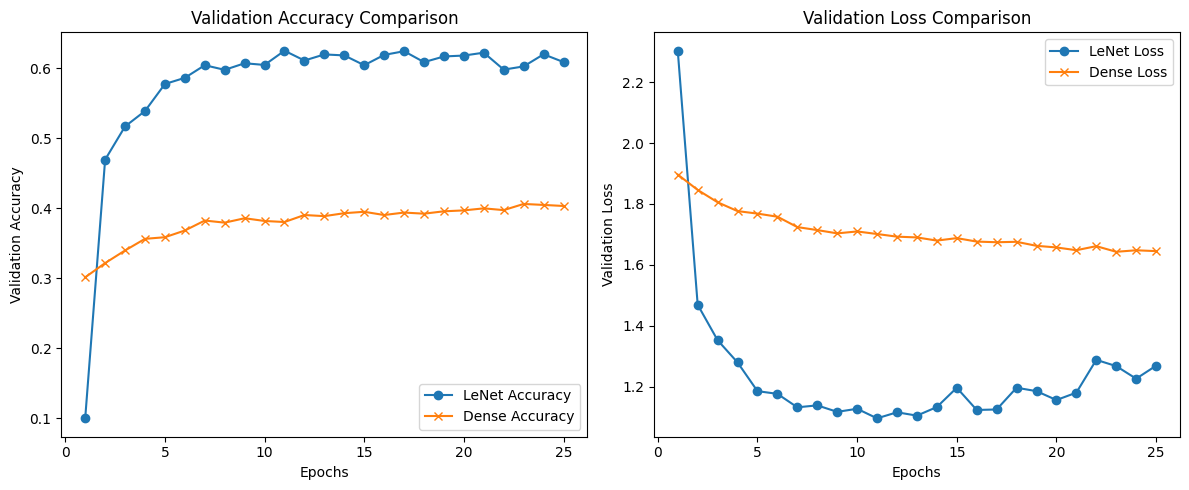

In [3]:
import matplotlib.pyplot as plt

# Data for plotting: validation accuracy and loss for both models (Dense and LeNet)
epochs = list(range(1, 26))

# Example validation accuracy and loss for Dense and LeNet models
lenet_accuracy = [0.1000, 0.4692, 0.5166, 0.5386, 0.5772, 0.5860, 0.6040, 0.5974, 0.6068, 0.6044, 0.6247, 0.6107, 0.6194, 0.6180, 0.6040, 0.6187, 0.6240, 0.6084, 0.6165, 0.6178, 0.6219, 0.5977, 0.6023, 0.6196, 0.6085]
dense_accuracy = [0.3013, 0.3216, 0.3396, 0.3562, 0.3585, 0.3681, 0.3823, 0.3793, 0.3856, 0.3817, 0.3802, 0.3902, 0.3886, 0.3928, 0.3948, 0.3902, 0.3937, 0.3921, 0.3955, 0.3968, 0.3997, 0.3972, 0.4060, 0.4046, 0.4031]

lenet_loss = [2.3032, 1.4691, 1.3526, 1.2798, 1.1855, 1.1766, 1.1324, 1.1388, 1.1175, 1.1276, 1.0962, 1.1161, 1.1051, 1.1333, 1.1966, 1.1237, 1.1253, 1.1967, 1.1855, 1.1563, 1.1806, 1.2882, 1.2677, 1.2264, 1.2690]
dense_loss = [1.8966, 1.8461, 1.8056, 1.7766, 1.7684, 1.7582, 1.7241, 1.7143, 1.7035, 1.7098, 1.7014, 1.6927, 1.6902, 1.6798, 1.6879, 1.6765, 1.6744, 1.6758, 1.6626, 1.6573, 1.6482, 1.6615, 1.6430, 1.6480, 1.6452]

# Plot validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, lenet_accuracy, label='LeNet Accuracy', marker='o')
plt.plot(epochs, dense_accuracy, label='Dense Accuracy', marker='x')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, lenet_loss, label='LeNet Loss', marker='o')
plt.plot(epochs, dense_loss, label='Dense Loss', marker='x')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
